# Prueba

Enunciado:

- Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
- Investigar los datos de los paises contigados por COVID-19, especialmente de latinoamerica (menos Ecuador), deberán escoger uno y que no se repita, para ello se va a seleccionar el orden en el que publique dentro del foro “Tema prueba 1”, con estos datos obtener los siguientes modelos:
- Generar un modelo matematico de prediccion para regresion lineal, exponencial, polinomico y logaritmico, de los nuevos contactos en la proxima semana (7 dias despues).
- Generar un modelo probabilistico con los datos.
- Finalmente, contrarestar los modelos matematicos y generar las siguientes conclusiones
    - Cual tiene una mejor prediccion
    - Ventajas y desventajas de los modelos.
    - Cual es el principal problema del modelo probabilistico
    - El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
        - Se debe establecer un modelo basado en modelos matematicos y probabilisticos.
        - El programa deberá generar gráficas que indiquen la ecuacion matematica y probabilistica de tendencias.
        - Deben calcularse las siguientes métricas:
            - Total de infectados dentro de 7 dias (matematico y probabilistico).

Finalmente, desarrollar dentro de un cuaderno de Jupyter Notebook, generar un PDF y subir al repositorio.

### DESARROLLO



In [160]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression  
%matplotlib inline

CASOS ULTIMO DIA
118629.0


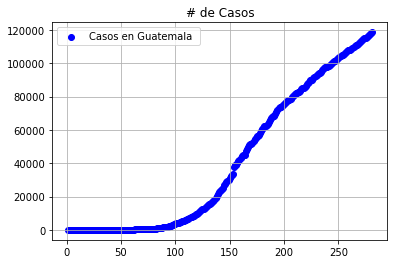

In [143]:
from datetime import datetime,timedelta

url = 'covidDatos.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Guatemala'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)

x=np.arange(1,len(df)+1,1) 
y=np.array(df.values[:,1], dtype='float')

print("CASOS ULTIMO DIA")
print(y[len(y)-1])
plt.scatter(x,y,label='Casos en Guatemala ', color='blue') 
plt.grid(True)
plt.legend()
plt.title('# de Casos');

#### Modelo Lineal

ECUACION DE LA RECTA F(X) = MX + B
M = [494.81019102], b = -51621.719244664615
PREDICCION
90883


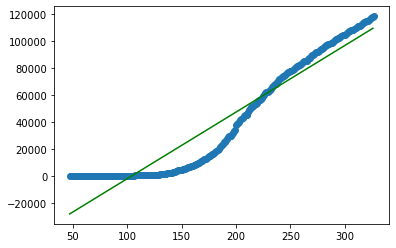

In [144]:
x = list(df.iloc [:, 0])
y = list(df.iloc [:, 1])

regr = linear_model.LinearRegression()
regr.fit(np.array(x).reshape(-1, 1) ,y)
y_prediccion = regr.predict([[len(x)+7]])

print("ECUACION DE LA RECTA F(X) = MX + B")
print('M = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))
print("PREDICCION +7")
print(int(y_prediccion))
plt.scatter(x, y)
x_real = np.array(range(min(x), max(x)))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

#### Modelo Exponecial

[0.03475559 2.21179784]
937201.5917971993


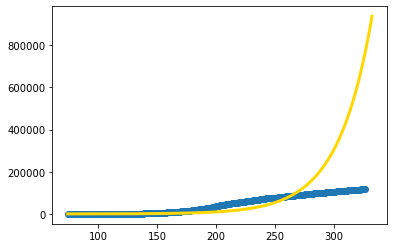

In [145]:
from scipy.optimize import curve_fit

x = x[27:len(x)-1]
y = y[27:len(y)-1]
curve_fit=np.polyfit(x,np.log(y),deg=1)
print(curve_fit)

pred_x=np.array(list(range(min(x),max(x)+7)))
yx=np.exp(curve_fit[1])*np.exp(curve_fit[0]*pred_x)
plt.plot(x,y,"o")
plt.plot(pred_x,yx,color='gold',linewidth=3.0)
print(yx[len(yx)-1])

#### Modelo Logistico

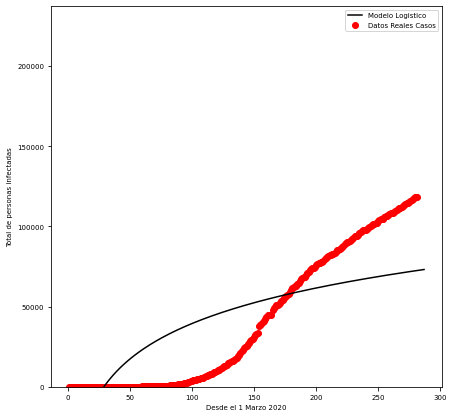

PREFICCION EN UNA SEMANA
73135.14078157538


In [159]:
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression  

def modelo_logistico(x,a,b):
    return a+b*np.log(x)

x=np.arange(1,len(df)+1,1)
y=np.array(df.values[:,1])

exp_fit = curve_fit(modelo_logistico,x,y)

pred_x = list(range(min(x),max(x)+7))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=7)

plt.scatter(x,y,label="Datos Reales Casos",color="red")

val = [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico",color="black")
plt.legend()
plt.xlabel("Desde el 1 Marzo 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim(0,max(y)*2)
plt.show()
print("PREFICCION EN UNA SEMANA")
print(val[len(pred_x)-1])

#### Modelo Polinomial

           5            4          3         2
1.889e-06 x - 0.001244 x + 0.2731 x - 20.22 x + 526.7 x - 3071


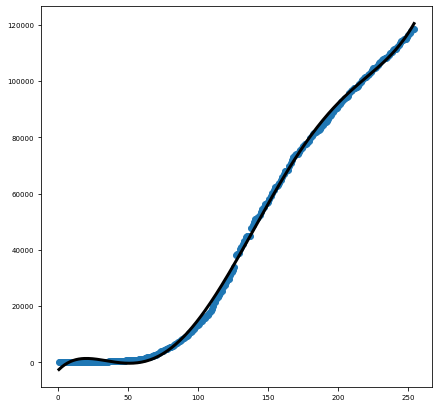

PREDICCION:  127477.95194


In [148]:
df = pd.read_csv('covidDatos.csv').fillna(0)
ndf= df.loc[(df['location'] == 'Guatemala') & (df['total_cases'] != 0)]
ndf1=ndf[['date','total_cases']]
x=np.arange(1,len(ndf1)+1,1, dtype='float')
y=np.array(ndf1.values[:,1], dtype='float')
fun_pol = np.poly1d(np.polyfit(x, y, 5))
print(fun_pol)

y_pred=fun_pol(x)

plt.scatter(x, y)
plt.plot(x, y_pred, c='black',lw=3)  
plt.show()

print("PREDICCION: " , round(fun_pol(len(x)+7),5))

#### Modelo Probabilistico

In [149]:
url = 'covidDatos.csv'
df = pd.read_csv(url).fillna(0) 
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,0.000,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
1,ABW,North America,Aruba,2020-03-19,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
3,ABW,North America,Aruba,2020-03-21,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
4,ABW,North America,Aruba,2020-03-22,0.0,0.0,0.286,0.0,0.0,0.0,...,35973.781,0.0,0.0,11.62,0.0,0.0,0.0,0.0,76.29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58693,0,0,International,2020-11-19,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58694,0,0,International,2020-11-20,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58695,0,0,International,2020-11-21,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0
58696,0,0,International,2020-11-22,696.0,0.0,0.000,7.0,0.0,0.0,...,0.000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0


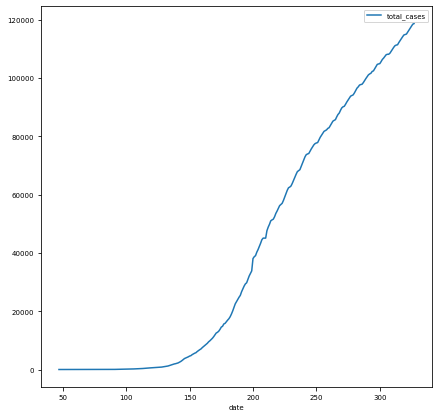

In [150]:
df = df[df['location'].isin(['Guatemala'])]
df = df.loc[:,['date','total_cases']]
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df
df.plot(x ='date', y='total_cases')

In [156]:
filtro = df["total_cases"][27:] 
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)

url = 'covidDatos.csv'
df = pd.read_csv(url).fillna(0) 
df = df[df['location'].isin(['Guatemala'])]
df = df.loc[:,['date','total_cases']]
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01",FMT)).days)
y = list(df.iloc [:, 1]) 
x = list(df.iloc [:, 0]) 


#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

38359.5
45256.25196850394
156988


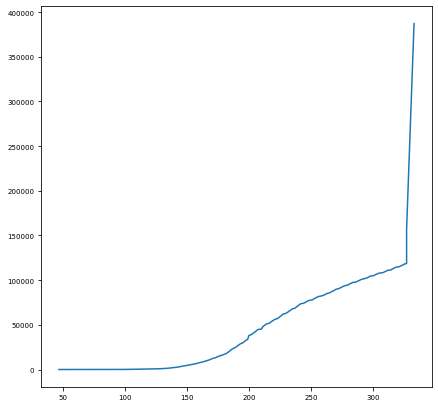

425501


In [158]:
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
prediccion_siguiente = int(y[-1] + mediana)
plt.plot(x, y)
plt.show()
print(prediccion_siguiente)

##### Cual tiene una mejor prediccion
El modelo que presenta o tiene una mejor prediccion con respecto a los datos que se tiene, es el Modelo Polinomial, el cual para este caso lo utilizamos con funcion polinomica de grado 5. El modelo probabilistico como se puede ver en la grafica del desarrollo se ajusta con una aproximacion muy grande, y el valor de la prediccion hace refrencia a un valor aproxiamado que se puede tener ya que los datos de contagios tienen una tendencia creciente lo que permite que el modelo polinomial pueja ajustarse y predecir de manera correcta.


##### Ventajas y desventajas de los modelos.

- Ventajas
    - La principal ventaja del modelo lineal es que presenta una ecuacion lineal que permite su facil interpretacion. El modelo lineal es implementado mayormente con datos que no tienen mucha informacion para una aporximacion asertada.
    - La ventaja del modelo exponecial es que permite aporximacionesa valores grandes y permite modelar con datos que precenta un crecimineto a medida que auta o crece su relacion. 
    - El modelo logistico emplea una funcion logaritmica que permite determina valores que presenta un crecimineto a inicios y mantienen con un crecimineto estable. este modelo es facil de empleas para datos de tendencia y que depsues presenta una estabilidad creciente. 
    - El modelo polinomial permite incorporar una funcion lineal como inicio y ajustarla a un modelo polinomico con de un grado n a paratir de la ecuacion lineal. Este modelo es empleado en datos que presenta un crecimineto lineal y modificarse en el tiempo

- Desventajas
     - El modelo lineal solo puede ser utilizado en datos que presenten una tenecia lineal, para los datos que presentan realiciones no se pueden emplear sin una transformacion de la entrda. 
     - La desventaja principal del modelo exponecial es que presenta un crecimineto que aumenta de forma exponecial es decir los datos son representados para un crecimineto positivo o imparable para los datos. 
     - El modelo logistico puede ser empleado siempre y cuando los datos se ajuste a un determida crecimiento y se mantengan estables de forma creciente.
     - El modelo polinomial puede ser empleado con datos grandes pero el grando recomendado para la ecuaciones es de 3 o 4.

##### Cual es el principal problema del modelo probabilistico

El principal problema del modelo probabilistico es que en base a la media y mediana de los datos que se tiene se pueden presentar un crecimiento descontrolado. Este modelo puede ser indetemrinado con datos muy grandes y descontrolados los cuales no prensenta una normalizacion para poder realizar el modelo que determine y pueda predecir de forma adecuada.

